<a href="https://colab.research.google.com/github/chandan2311/Machine-learning/blob/main/callback_fmnsit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.10/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [3]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if(logs.get('loss')<0.4):
      print("\n loss is lower thn 0.4 so cancelling training!")
      self.model.stop_training=True
callbacks=myCallback()

In [4]:
fmnist=keras.datasets.fashion_mnist

In [5]:
(training_images,training_label),(testing_images,testing_label)=fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [6]:
print(len(training_label))

60000


In [7]:
print(len(training_images))

60000


In [8]:
import numpy as np
import matplotlib.pyplot as plt

index=11
np.set_printoptions(linewidth=320)

print(f"Label:{training_label[index]}")
print(f"images:{training_images[index]}")

Label:9
images:[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0  39 111  93  85  27   0   0   0   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0   0 190 244 248 255 255 155 202 212 150   9   0   3   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   2   0   0 213 227 233 227 243 246 255 250 255 146   0   9   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   4   0   6 244 233 236 244 232 214 248 242 251  33   0   7   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   6   0  72 255 231 239 244 237 226 255 252 207  44  24   0   2   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 125 231 215 253 252 234 246 254 239 128 114  63   0   3   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0 189 230 198 185 219 218 255 206 255 133  31   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   4   0   0 224 241 255 236 237 223 191 219 166   0   0   1   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   1   0  61 245 202 220

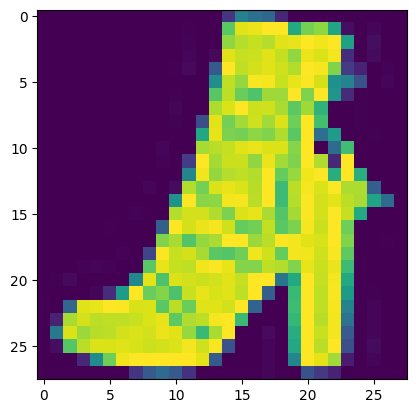

In [9]:
plt.imshow(training_images[index])

In [10]:
len(training_images)

60000

In [11]:
training_images=training_images/255.0
testing_images=testing_images/255.0

In [12]:
model=keras.models.Sequential([keras.layers.Flatten(),keras.layers.Dense(128,activation=tf.nn.relu),keras.layers.Dense(10,activation=tf.nn.softmax)])

In [13]:
model.compile(optimizer=tf.optimizers.Adam(),loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [14]:
len(training_images)

60000

In [15]:
model.fit( training_images, training_label,epochs=25,callbacks=[callbacks])

Epoch 1/25
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4987 - accuracy: 0.8251
Epoch 2/25
1853/1875 [============================>.] - ETA: 0s - loss: 0.3751 - accuracy: 0.8641
 loss is lower thn 0.4 so cancelling training!
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3749 - accuracy: 0.8645


In [16]:
model.evaluate(testing_images,testing_label)

313/313 [==============================] - 1s 1ms/step - loss: 0.3770 - accuracy: 0.8646


[0.3769508898258209, 0.8646000027656555]